# Trabajo Final Inteligencia Artificial I - año 2018: Visión Artificial
---

# Dependencias
---

In [61]:
import numpy as np

from matplotlib import pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

from skimage import io, color, img_as_float, filters
from skimage.feature import hog

import cv2
import mahotas

## Funciones y clases definidas

- [Representación](./01-representacion.ipynb):

In [62]:
def img2grey(image, mode='sk'):
    if (mode=='sk'):
        gray = color.rgb2gray(image)
    elif (mode=='cv'):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray

def normSize(image, size=(tuple((400, 300)))):
    image = cv2.resize(image, size)
    return image

- [Filtración](./02-filtracion.ipynb):

In [63]:
def imgClean(image, sigma=1, mode='sk'):
    if (mode == 'sk'):
        clean = filters.gaussian(image, sigma)
    elif (mode == 'cv'):
        clean = cv2.GaussianBlur(image, (3, 3), 0)
    return clean

def imgEdge(image, mode='sk'):
    if (mode == 'sk'):
        edge = filters.sobel(image)
    elif (mode == 'cv'):
        edge = cv2.Laplacian(image, cv2.CV_64F)
    return edge

- [Segmentación](./03-segmentacion.ipynb):

In [64]:
def threshold(image, mode='sk'):
    if (mode == 'sk'):
        th = filters.threshold_isodata(image)
    elif (mode == 'cv'):
        ret, th = cv2.threshold(image, 0, 255,
                                cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return (image < th)

- [Extracción de características](./04-extraccion.ipynb):

In [65]:
def m_hog(image):
    feature = hog(image, block_norm='L2-Hys').ravel()
    return feature

def hu_moments(image):
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

def haralick(image):
    feature= mahotas.features.haralick(image).mean(axis=0)
    return feature

def color_histogram(image, mask=None, bins=8):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins],
                        [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    feature = hist.flatten()
    return feature

In [66]:
def stats(arr):
    
    sum = 0
    for value in arr:
        sum += value
    med = sum / len(arr)
    sum = 0
    for value in arr:
        sum += np.power((value - med), 2)
    dstd = np.sqrt(sum / (len(arr) - 1))
    
    return med, dstd

- [Algoritmos](./05-algoritmos.ipynb):

In [67]:
class Elemento:
    def __init__(self):
        self.label = None
        self.image = None
        self.feature = []
        self.distance = 0

In [68]:
def printProgressBar(iteration, total, prefix='', suffix='',
                     decimals=1, length=100, fill='█'):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of
    decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
    """
    percent = (
        "{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print('\r%s |%s| %s%% %s' % (prefix, bar, percent, suffix), end='\r')
    # Print New Line on Complete
    if iteration == total:
        print()

In [70]:
def ft_extract(image):
    image = normSize(image)
    aux = img2grey(image, mode='cv')
    aux = imgClean(aux, mode='cv')
    aux = imgEdge(aux)
    # aux = threshold(aux, mode='cv')
    # image = imgClean(image, mode='cv')
    
    # image_fht = haralick(aux)
    image_fhm = hu_moments(aux)
    # image_fch = color_histogram(image)
    # image_fhog = m_hog(aux)

    # feature = np.hstack([image_fht, image_fhm, image_fhog])
    # med, dstd = stats(image_fch)
    # feature = feature.reshape(1, -1)

    # return aux, [med, dstd]
    return aux, [image_fhm[0], image_fhm[1], image_fhm[3]]

# Análisis de la base de datos
---

## Base de datos de entrenamiento

Se define una función para analizar repetidas veces la información de entrenamiento de forma más sencilla:

In [72]:
def data_analysis():

    banana = io.ImageCollection('./data/banana/*.png:./data/banana/*.jpg')
    orange = io.ImageCollection('./data/orange/*.png:./data/orange/*.jpg')
    lemon = io.ImageCollection('./data/lemon/*.png:./data/lemon/*.jpg')

    data = []
    i = 0

    # Análisis de bananas en base de datos
    iter = 0
    printProgressBar(iter, len(banana), prefix='Loading banana data:',
                     suffix='Complete', length=50)
    for fruit in banana:
        data.append(Elemento())
        data[i].label = 'banana'
        data[i].image, data[i].feature = ft_extract(fruit)
        i += 1
        iter += 1
        printProgressBar(iter, len(banana), prefix='Loading banana data:',
                         suffix='Complete', length=50)
    print("Banana data is ready")

    # Análisis de naranjas en base de datos
    iter = 0
    printProgressBar(iter, len(orange), prefix='Loading orange data:',
                     suffix='Complete', length=50)
    for fruit in orange:
        data.append(Elemento())
        data[i].label = 'orange'
        data[i].image, data[i].feature = ft_extract(fruit)
        i += 1
        iter += 1
        printProgressBar(iter, len(orange), prefix='Loading orange data:',
                         suffix='Complete', length=50)
    print("Orange data is ready")

    # Análisis de limones en la base de datos
    iter = 0
    printProgressBar(iter, len(lemon), prefix='Loading lemon data:',
                     suffix='Complete', length=50)
    for fruit in lemon:
        data.append(Elemento())
        data[i].label = 'lemon'
        data[i].image, data[i].feature = ft_extract(fruit)
        i += 1
        iter += 1
        printProgressBar(iter, len(lemon), prefix='Loading lemon data:',
                         suffix='Complete', length=50)
    print("Lemon data is ready")

    print("Data analysis completed")
    return data

## Base de datos de testeo

Se define una función para analizar repetidas veces la información de testeo de forma más sencilla:

In [73]:
def test_analysis():

    banana_test = io.ImageCollection('./test/banana/*.png:./test/banana/*.jpg')
    orange_test = io.ImageCollection('./test/orange/*.png:./test/orange/*.jpg')
    lemon_test = io.ImageCollection('./test/lemon/*.png:./test/lemon/*.jpg')

    test = []
    i = 0

    # Análisis de bananas en base de datos
    iter = 0
    printProgressBar(iter, len(banana_test), prefix='Loading banana test data:',
                     suffix='Complete', length=50)
    for fruit in banana_test:
        test.append(Elemento())
        test[i].label = 'banana'
        test[i].image, test[i].feature = ft_extract(fruit)
        i += 1
        iter += 1
        printProgressBar(iter, len(banana_test), prefix='Loading banana test data:',
                         suffix='Complete', length=50)
    print("Banana test data is ready")

    # Análisis de naranjas en base de datos
    iter = 0
    printProgressBar(iter, len(orange_test), prefix='Loading orange test data:',
                     suffix='Complete', length=50)
    for fruit in orange_test:
        test.append(Elemento())
        test[i].label = 'orange'
        test[i].image, test[i].feature = ft_extract(fruit)
        i += 1
        iter += 1
        printProgressBar(iter, len(orange_test), prefix='Loading orange test data:',
                         suffix='Complete', length=50)
    print("Orange test data is ready")

    # Análisis de limones en la base de datos
    iter = 0
    printProgressBar(iter, len(lemon_test), prefix='Loading lemon test data:',
                     suffix='Complete', length=50)
    for fruit in lemon_test:
        test.append(Elemento())
        test[i].label = 'lemon'
        test[i].image, test[i].feature = ft_extract(fruit)
        i += 1
        iter += 1
        printProgressBar(iter, len(lemon_test), prefix='Loading lemon test data:',
                         suffix='Complete', length=50)
    print("Lemon test data is ready")

    print("Test data analysis completed")
    return test

# Resultados con algoritmo K-nn
---

Se define una función con la implementación del algoritmo K-nn que recibe como parámetro **K**, para poder ejecutar repetidas veces con K variable de forma sencilla:

In [74]:
# NOTA IMPORTANTE: Antes de ejecutar este bloque 
# actualizar base de datos test

def knn(k, data, test):

    correct = 0

    for t in test:

        for element in data:
            sum = 0
            i = 0
            for ft in (element.feature):
                sum = sum + np.power(np.abs((t.feature[i]) - ft), 2)
                i += 1

            element.distance = np.sqrt(sum)

        # Bubblesort
        swap = True
        while (swap):
            swap = False
            for i in range(1, len(data)-1) :
                if (data[i-1].distance > data[i].distance):
                    aux = data[i]
                    data[i] = data[i-1]
                    data[i-1] = aux
                    swap = True

        eval = [0, 0, 0]

        for i in range(0, k):

            if (data[i].label == 'banana'):
                eval[0] += 10

            if (data[i].label == 'orange'):
                eval[1] += 10

            if (data[i].label == 'lemon'):
                eval[2] += 10

        aux = eval[0]
        if (aux < eval[1]):
            aux = eval[1]
        if (aux < eval[2]):
            aux = eval[2]

        if (aux == eval[0]):
            label = 'banana'
        if (aux == eval[1]):
            label = 'orange'
        if (aux == eval[2]):
            label = 'lemon'

        if (t.label == label):
            correct += 1
         
    return correct

## Rendimiento en función de K
Para ejecutar el siguiente código, cambiar kernel a un kernel de bash.

In [77]:
data = data_analysis()
test = test_analysis()

MAX = 50

ans = []
printProgressBar(0, MAX, prefix='Progreso:',
             suffix='Total', length=50)

for k in range(1, MAX):
    ans.append(knn(k, data, test))
    printProgressBar(k, MAX, prefix='Progreso:',
                 suffix='Total', length=50)

printProgressBar(MAX, MAX, prefix='Progreso:',
             suffix='Total', length=50)

Loading banana data: |██████████████████████████████████████████████████| 100.0% Complete
Banana data is ready
Loading orange data: |██████████████████████████████████████████████████| 100.0% Complete
Orange data is ready
Loading lemon data: |██████████████████████████████████████████████████| 100.0% Complete
Lemon data is ready
Data analysis completed
Loading banana test data: |██████████████████████████████████████████████████| 100.0% Complete
Banana test data is ready
Loading orange test data: |██████████████████████████████████████████████████| 100.0% Complete
Orange test data is ready
Loading lemon test data: |██████████████████████████████████████████████████| 100.0% Complete
Lemon test data is ready
Test data analysis completed
Progreso: |██████████████████████████████████████████████████| 100.0% Total


Text(0.5,0,'K')

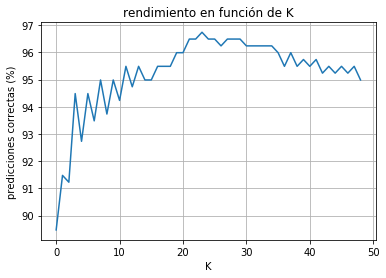

In [78]:
for i in range(0, len(ans)):
    ans[i] = ans[i] * 100 / len(test)

fig, ax = plt.subplots()
ax.plot(ans)
ax.grid(True)
ax.set_title('rendimiento en función de K')
plt.ylabel('predicciones correctas (%)')
plt.xlabel('K')

# Resultados con algoritmo K-means
---

## Entrenamiento del algoritmo

In [ ]:
import random

banana_data = []
orange_data = []
lemon_data = []

for element in data:
    if (element.label == 'banana'):
        banana_data.append(element)
    if (element.label == 'orange'):
        orange_data.append(element)
    if (element.label == 'lemon'):
        lemon_data.append(element)

b_mean = list(random.choice(banana_data).feature)
o_mean = list(random.choice(orange_data).feature)
l_mean = list(random.choice(lemon_data).feature)

b_flag = True
o_flag = True
l_flag = True

b_len = [0, 0, 0]
o_len = [0, 0, 0]
l_len = [0, 0, 0]

iter = 0

# while (b_flag or o_flag or l_flag):
while (iter < 20):
    
    banana_data = []
    orange_data = []
    lemon_data = []

    # ASIGNACION

    for element in data:
        sum_b = 0
        sum_o = 0
        sum_l = 0

        for i in range(0, len(element.feature)-1):
            sum_b += np.power(np.abs(b_mean[i] - element.feature[i]), 2)
            sum_o += np.power(np.abs(o_mean[i] - element.feature[i]), 2)
            sum_l += np.power(np.abs(l_mean[i] - element.feature[i]), 2)

        dist_b = np.sqrt(sum_b)
        dist_o = np.sqrt(sum_o)
        dist_l = np.sqrt(sum_l)
        
        aux = dist_b
        if (dist_o < aux):
            aux = dist_o
        if (dist_l < aux):
            aux = dist_l
            
        if (aux == dist_b):
            banana_data.append(element.feature)
        elif (aux == dist_o):
            orange_data.append(element.feature)
        elif(aux == dist_l):
            lemon_data.append(element.feature)
            
    # ACTUALIZACION
    sum_b = [0, 0, 0]
    for b in banana_data:
        sum_b[0] += b[0]
        sum_b[1] += b[1]
        sum_b[2] += b[2]

    sum_o = [0, 0, 0]
    for o in orange_data:
        sum_o[0] += o[0]
        sum_o[1] += o[1]
        sum_o[2] += o[2]

    sum_l = [0, 0, 0]
    for l in lemon_data:
        sum_l[0] += l[0]
        sum_l[1] += l[1]
        sum_l[2] += l[2]

    b_mean[0] = sum_b[0] / len(banana_data)
    b_mean[1] = sum_b[1] / len(banana_data)
    b_mean[2] = sum_b[2] / len(banana_data)

    o_mean[0] = sum_o[0] / len(orange_data)
    o_mean[1] = sum_o[1] / len(orange_data)
    o_mean[2] = sum_o[2] / len(orange_data)

    l_mean[0] = sum_l[0] / len(lemon_data)
    l_mean[1] = sum_l[1] / len(lemon_data)
    l_mean[2] = sum_l[1] / len(lemon_data)
    
    # print(len(banana_data), len(orange_data), len(lemon_data))
    
    # CONVERGENCIA Y CONDICIÓN DE SALIDA
    print(len(banana_data), len(orange_data), len(lemon_data))
    
    if (b_mean == b_len):
        b_flag = False
    else:
        b_len = b_mean
        
    if (o_mean == o_len):
        o_flag = False
    else:
        o_len = o_mean

    if (l_mean == l_len):
        l_flag = False
    else:
        l_len = l_mean
    
    iter += 1

## Evaluación de rendimiento

In [ ]:
correct = 0

printProgressBar(correct, len(test), prefix='Correct predictions:',
                 suffix='Total', length=50)

for t in test:

    sum_b = 0
    sum_o = 0
    sum_l = 0

    for i in range(0, len(t.feature)-1):
        sum_b += np.power(np.abs(t.feature[i] - b_mean[i]), 2)
        sum_o += np.power(np.abs(t.feature[i] - o_mean[i]), 2)
        sum_l += np.power(np.abs(t.feature[i] - l_mean[i]), 2)

    dist_b = np.sqrt(sum_b)
    dist_o = np.sqrt(sum_o)
    dist_l = np.sqrt(sum_l)
    # print(dist_b, dist_o, dist_l)
    
    aux = dist_b
    if (dist_o < aux):
        aux = dist_o
    if (dist_l < aux):
        aux = dist_l

    if (aux == dist_b):
        label = 'banana'
    if (aux == dist_o):
        label = 'orange'
    if (aux == dist_l):
        label = 'lemon'

    if (t.label == label):
        correct += 1
    
    printProgressBar(correct, len(test), prefix='Corrects prediction:',
                 suffix='Total', length=50)